In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load Cleaned Datasets

In [2]:
df1_filtered = pd.read_csv("data/df1_filtered.csv")
df1_filtered.head(5)

,State,County,City,Make,Model,ModelYear,EVType,ElectricRange,BasePrice
0,WA,King,Seattle,BMW,X5,2023,PHEV,30,0
1,WA,Yakima,Moxee,FORD,ESCAPE,2022,PHEV,38,0
2,WA,King,Seattle,CHEVROLET,BOLT EV,2018,BEV,238,0
3,WA,King,Newcastle,TESLA,MODEL S,2013,BEV,208,69900
4,WA,Kitsap,Bremerton,FORD,C-MAX,2015,PHEV,19,0


In [3]:
df2_filtered = pd.read_csv("data/df2_filtered.csv")
df2_filtered.head(5)

,Date,State,County,BEVCount,PHEVCount,EVTotal,NonEVTotal
0,2021-04-30,WA,Thurston,0,0,0,56710
1,2017-10-31,WA,Adams,3,3,6,12283
2,2018-07-31,WA,Whatcom,2,0,2,42313
3,2019-08-31,WA,Grays Harbor,0,0,0,20570
4,2019-10-31,WA,Cowlitz,0,0,0,29023


In [4]:
# Filter the datasets for each state
df1_wa = df1_filtered[df1_filtered["State"] == "WA"]
df1_ca = df1_filtered[df1_filtered["State"] == "CA"]

df2_wa = df2_filtered[df2_filtered["State"] == "WA"]
df2_ca = df2_filtered[df2_filtered["State"] == "CA"]

## Analysis and Visualizations

### Cross-State EV Adoption Dynamics: A Comparative Analysis of Washington and California

Which 5 counties, among all counties in WA/CA State, have experienced the most significant cumulative growth in electric vehicle (EV) adoption over time, and how do their annual growth rates and absolute EV counts compare to those of all other counties in the state?

In [5]:
def analyze_county_ev_adoption(df_state, state_name):
    """
    Analyze and visualize the growth rate of EV adoption in different counties within a given state.

    Parameters:
    - df_state (DataFrame): DataFrame containing EV adoption data for a state.
    - state_name (str): The name of the state.

    Returns:
    - DataFrame: Top 5 counties by growth rate.
    """

    # Calculate annual totals and growth rate
    df_state["Year"] = pd.to_datetime(df_state["Date"]).dt.year
    annual_ev_total = (
        df_state.groupby(["County", "Year"])["EVTotal"].sum().reset_index()
    )
    annual_ev_total["GrowthRate"] = (
        annual_ev_total.groupby("County")["EVTotal"].pct_change() * 100
    )

    # Calculate cumulative growth rate for each county
    cumulative_growth = (
        annual_ev_total.groupby("County")["GrowthRate"].prod().reset_index()
    )
    cumulative_growth.columns = ["County", "CumulativeGrowthRate"]
    top_5_growth_counties = cumulative_growth.nlargest(5, "CumulativeGrowthRate")

    # Filter annual EV total to include only top 5 growth counties
    annual_ev_total_top_5 = annual_ev_total[
        annual_ev_total["County"].isin(top_5_growth_counties["County"])
    ]

    # Create subplots
    fig, axs = plt.subplots(2, 2, figsize=(16, 12))
    plot_settings = [
        (
            annual_ev_total,
            "GrowthRate",
            f"Annual Growth Rate of EV Adoption for All Counties in {state_name}",
            axs[0, 0],
        ),
        (
            annual_ev_total_top_5,
            "GrowthRate",
            f"Annual Growth Rate of EV Adoption for Top 5 Growth Counties in {state_name}",
            axs[0, 1],
        ),
        (
            annual_ev_total,
            "EVTotal",
            f"Absolute EV Counts of EV Adoption for All Counties in {state_name}",
            axs[1, 0],
        ),
        (
            annual_ev_total_top_5,
            "EVTotal",
            f"Absolute EV Counts of EV Adoption for Top 5 Growth Counties in {state_name}",
            axs[1, 1],
        ),
    ]

    for data, y_value, title, ax in plot_settings:
        sns.lineplot(data=data, x="Year", y=y_value, hue="County", marker="o", ax=ax)
        ax.set_title(title)
        ax.set_ylabel(y_value)
        if y_value == "GrowthRate":
            ax.set_ylabel(f"{y_value} (%)")
        if ax not in [axs[0, 1], axs[1, 1]]:
            ax.get_legend().remove()

    plt.tight_layout()
    plt.show()

    return top_5_growth_counties

C:\Users\SS\AppData\Local\Temp\ipykernel_40380\3595924362.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state["Year"] = pd.to_datetime(df_state["Date"]).dt.year


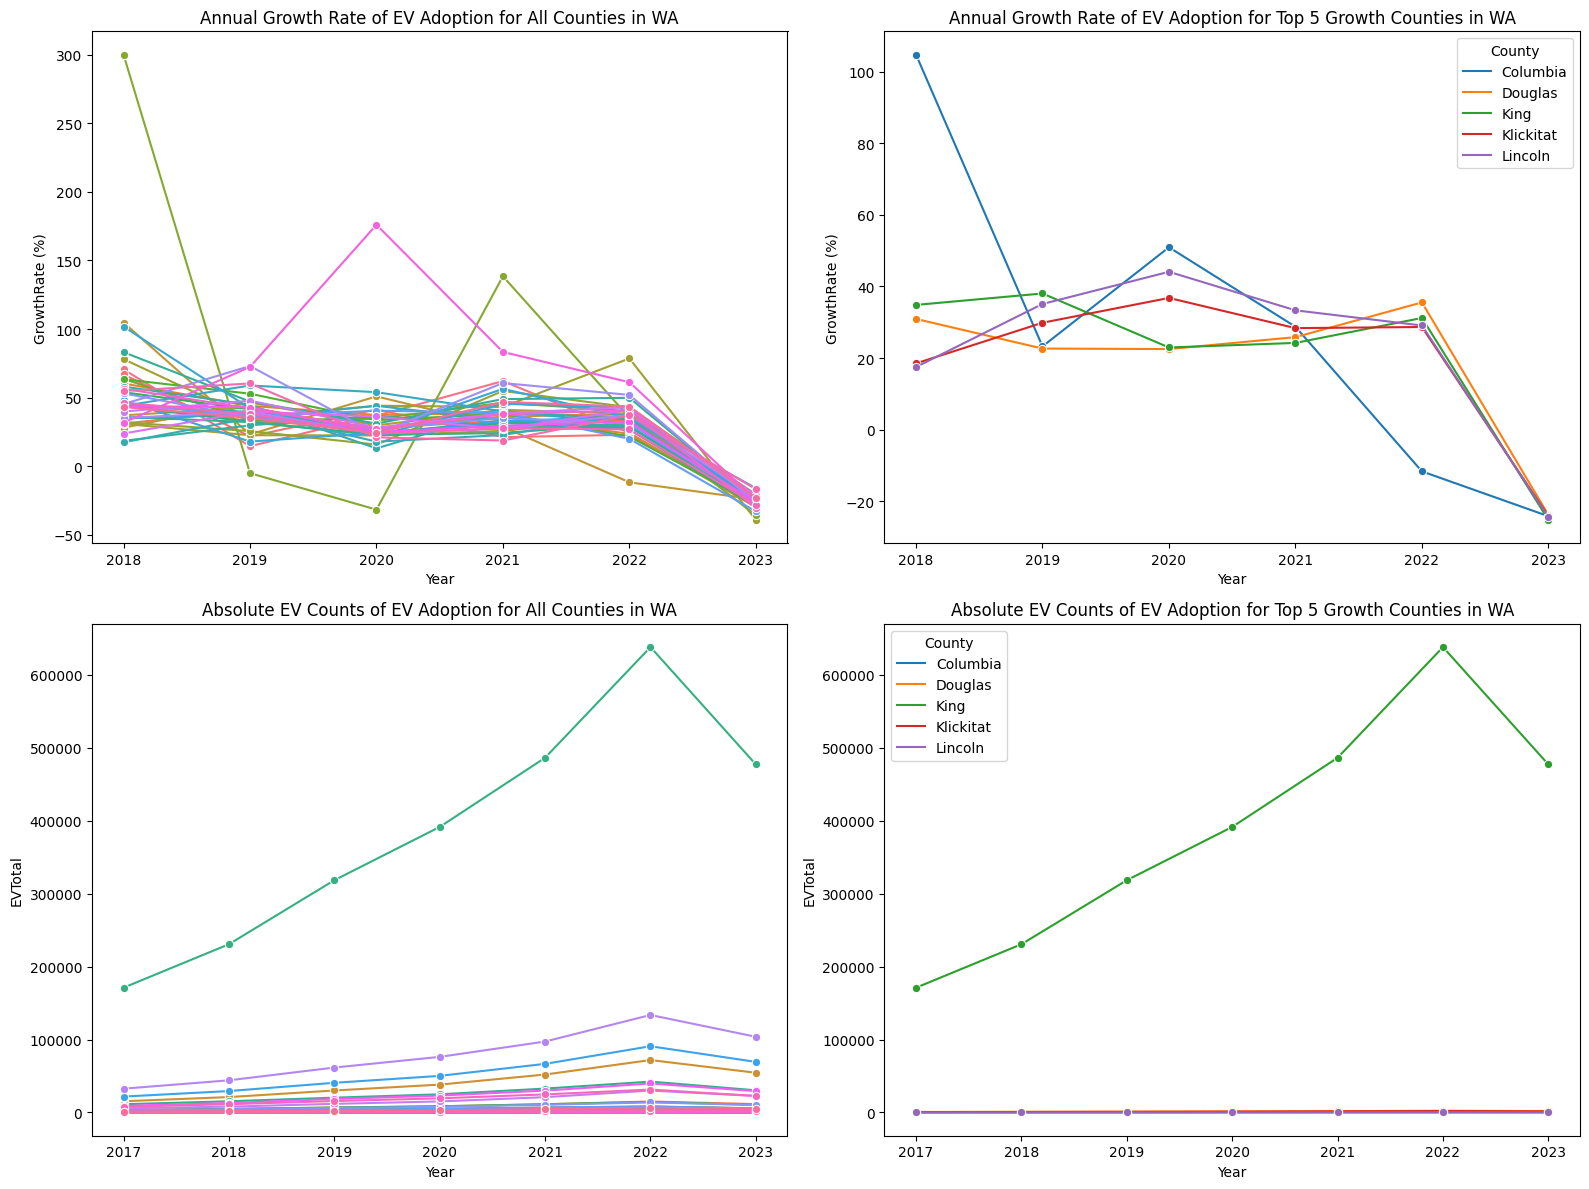

WA        County  CumulativeGrowthRate
6    Columbia          1.005046e+09
8     Douglas         -3.451894e+08
19  Klickitat         -3.997471e+08
16       King         -5.799180e+08
21    Lincoln         -6.422970e+08


In [6]:
# WA
top_5_growth_counties_wa = analyze_county_ev_adoption(df2_wa, "WA")
print("WA", top_5_growth_counties_wa)

### **Result of WA Analysis**

### Findings:

#### **Growth Rate Trend Analysis**
- Most counties in WA state exhibited similar trends over time, with a significant drop in growth rates from 2022 to 2023.
  
- The top 5 counties, particularly one, showed a more drastic change in growth rates over the years. This suggests that these counties might have experienced some unique events or conditions that affected EV adoption differently from the rest.

- The decline in growth rate in 2023 across counties might indicate a saturation point in EV adoption or external factors affecting the entire state, such as policy changes or economic conditions.

#### **Absolute EV Count Analysis:**
- Some counties exhibit minimal change in absolute EV counts over the years, indicating lower adoption rates.

- The notable increase from 2021 to 2022 and the subsequent drop from 2022 to 2023 in one county could be due to localized factors or events promoting EV adoption in the short term, followed by a reversion to the mean.

- The county with a dramatic increase in EV counts and subsequent drop might have a more considerable influence on the state's overall EV adoption trends, given its substantial variation in EV counts.

#### **Comparison Between Growth Rate and Absolute Counts:**
- The counties with the highest cumulative growth rates are not necessarily the ones with the highest absolute EV counts. This contrast implies that growth rates alone might not fully represent the state of EV adoption in the county, especially if the initial counts are low.

- The county with substantial variations in both growth rate and absolute EV counts, which is King county, requires further investigation to understand the underlying causes and implications better.


### **Analysis: Why King County Stands Out in Terms of Variations in Both Growth Rate and Absolute EV Counts**

#### 1. **Economic Factors:**
   - King County's average income plays a role in residents' capacity to afford EVs.
   - Specific economic incentives for EVs in King County can drive higher EV adoption.

#### 2. **Infrastructure:**
   - The availability and accessibility of charging stations in King County directly affect the convenience of owning an EV.
   - The efficiency of public transportation systems can either complement or compete with EV ownership trends.

#### 3. **Demographic and Psychographic Factors:**
   - Population density and urban planning can determine the practicality of owning EVs.
   - Higher education levels and environmental awareness among King County residents correlate positively with EV adoption rates.

#### 4. **Policy & Regulation:**
   - Local policies in King County, particularly fleet conversions, can significantly promote EV adoption.
   - Various benefits and initiatives are in place to encourage residents to shift to EVs.

#### 5. **Market Dynamics:**
   - A higher concentration of EV dealerships in King County makes purchasing EVs more convenient.
   - Fluctuations in fuel prices can influence decisions between traditional vehicles and EVs.

#### 6. **External Shocks:**
   - Significant events or anomalies, whether environmental, economic, or political, might temporarily spike interest and adoption of EVs in King County.

#### 7. **Community Engagement:**
   - Community-driven initiatives and public awareness campaigns play a crucial role.
   - A strong focus on promoting sustainability and EV adoption among King County residents can drive significant change.


C:\Users\SS\AppData\Local\Temp\ipykernel_40380\3595924362.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state["Year"] = pd.to_datetime(df_state["Date"]).dt.year


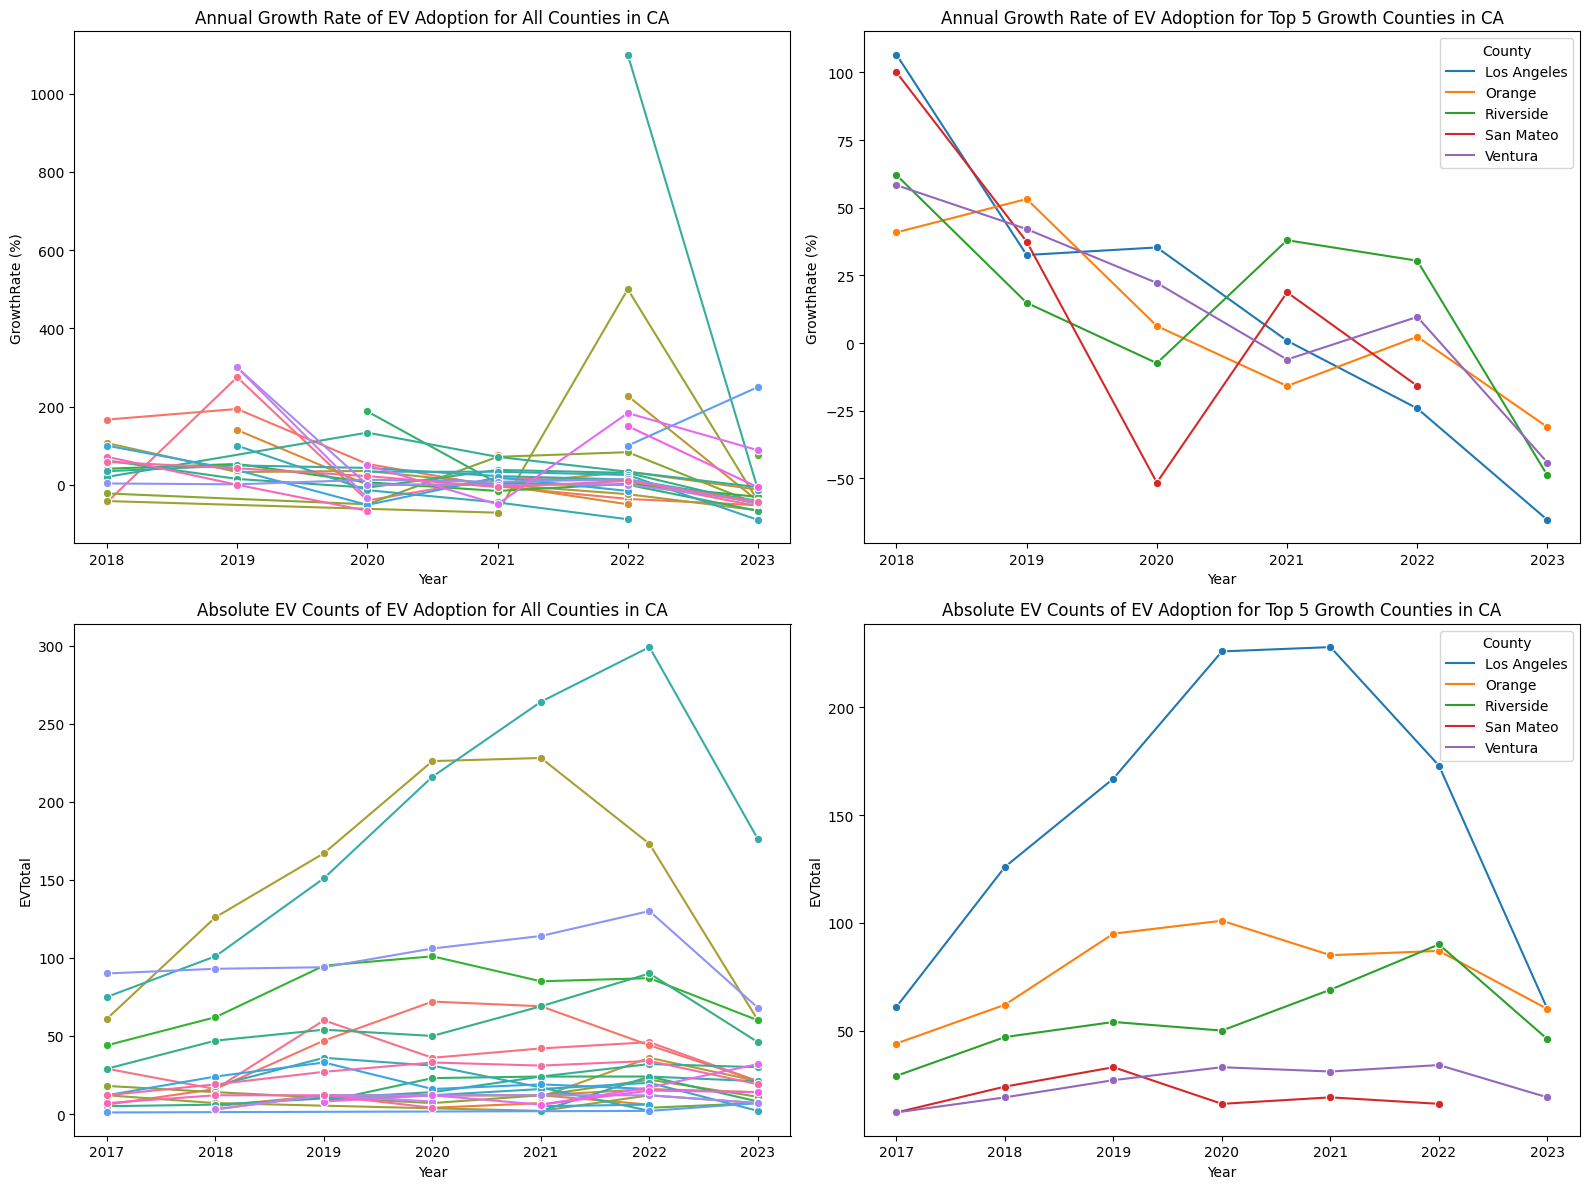

CA          County  CumulativeGrowthRate
12    Riverside          3.871728e+08
6   Los Angeles          1.708103e+08
28      Ventura          1.412305e+08
19    San Mateo          5.719199e+07
10       Orange          1.590831e+07


In [7]:
# CA

top_5_growth_counties_ca = analyze_county_ev_adoption(df2_ca, "CA")
print("CA", top_5_growth_counties_ca)

### **Result of CA Analysis**

In California, specific counties such as Riverside, Los Angeles, Ventura, San Mateo, and Orange have exhibited significant variations in EV adoption trends between 2018 to 2023. The intricate dynamics of these fluctuations suggest the impact of various underlying factors.

#### **Overall Growth Rate:**
- From 2018 to 2023, many counties showcased varying growth rates.
- There was a distinctive surge in growth rates for some counties in 2019.
- A phase of stabilization or minimal growth persisted until 2022, culminating in a decrease in 2023.

#### **Top 5 Counties:**
- These counties, especially Riverside and Los Angeles, exhibited more pronounced growth rate fluctuations.
- Peaks and troughs in the growth rates of these counties were significantly noticeable.

#### **Absolute EV Counts:**
- For the majority of counties, the absolute EV counts portrayed relative stability.
- However, the top 5 counties stood out with considerable growth until 2022, followed by a decline in 2023.


### **Comparison Between WA and CA: Similarities & Differences in EV Adoption**

Counties leading in EV adoption in both states exhibit similarities that likely contribute to the higher rates of EV adoption. Factors influencing these patterns may range from economic determinants to urbanization and policy support.

#### **Shared Factors Across Standout Counties:**
- **Economic Factors:** Prosperity allows greater purchasing power for potentially costlier EVs.
- **Infrastructure:** Availability of charging stations and other related facilities.
- **Demographics & Socio-cultural Attributes:** Population density, education levels, and environmental awareness.
- **Policy Environment:** Local regulations and incentives that promote EV adoption.
- **Urbanization:** Highly urbanized areas with greater population density tend to see higher EV adoption.

#### **State-specific Observations:**

- **WA's King County:** 
  - Influenced by its economic prosperity.
  - High population density and urbanization, potentially due to Seattle's tech-savvy, environmentally-conscious populace.

- **CA's Los Angeles & Orange Counties:**
  - Stand out due to high population and economic affluence.
  - Abundant charging infrastructures and EV dealerships further aid adoption.

#### **Common Trends (2022-2023):**
Both WA and CA witnessed a significant drop in EV adoption from 2022 to 2023. Potential reasons for this trend include:

- **Economic Conditions:** A potential recession could have diminished consumers' ability and willingness to purchase new vehicles, especially the pricier EVs.
  
- **Supply Chain Issues:** Disruptions may have resulted in delays or reduced availability of EVs.

- **Fuel Prices:** A drop in fuel prices could make traditional vehicles more financially appealing compared to EVs.


### Comparative Analysis of BEV and PHEV Adoption Dynamics in Top Counties of WA and CA

How have the yearly adoption trends and preferences for BEV and PHEV, EV and NonEV compared to each other within the top 5 counties?

In [8]:
top_counties_WA = ["Columbia", "Douglas", "Klickitat", "King", "Lincoln"]
top_counties_CA = ["Riverside", "Los Angeles", "Ventura", "San Mateo", "Orange"]

In [9]:
def analyze_ev_counts(df, state_name, top_counties):
    # Filter for relevant records
    top_counties_df = df[
        (df["State"] == state_name) & (df["County"].isin(top_counties))
    ].copy()

    # Extract year and group by year and county
    top_counties_df["Year"] = pd.to_datetime(top_counties_df["Date"]).dt.year
    grouped_df = (
        top_counties_df.groupby(["County", "Year"])[["BEVCount", "PHEVCount"]]
        .sum()
        .reset_index()
    )

    # Melting the df for easier plotting
    bev_phev_df = grouped_df.melt(
        id_vars=["County", "Year"],
        value_vars=["BEVCount", "PHEVCount"],
        value_name="Count",
        var_name="Vehicle Type",
    )

    sns.set_style("whitegrid")
    palette = "viridis"

    for county in top_counties:
        fig, ax = plt.subplots(figsize=(8, 4))

        # Plotting BEV and PHEV
        sns.barplot(
            x="Year",
            y="Count",
            hue="Vehicle Type",
            data=bev_phev_df[bev_phev_df["County"] == county],
            ax=ax,
            palette=palette,
        )
        ax.set_title(
            f"{county} County in {state_name} - BEV and PHEV Counts Over Years",
            fontsize=16,
            fontweight="bold",
        )
        ax.set_ylabel("Count", fontsize=12)
        ax.set_xlabel("Year", fontsize=12)
        ax.legend(
            loc="upper right",
            frameon=True,
            title="Vehicle Type",
            title_fontsize="13",
            fontsize="11",
        )
        ax.grid(True, linestyle="--", alpha=0.7)
        ax.tick_params(axis="x", rotation=45)

        plt.tight_layout(pad=3.0)
        plt.show()

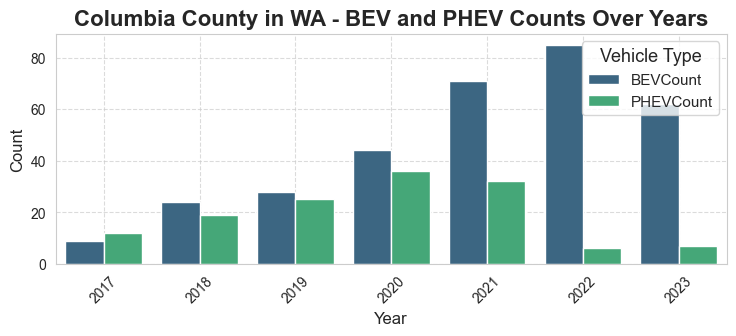

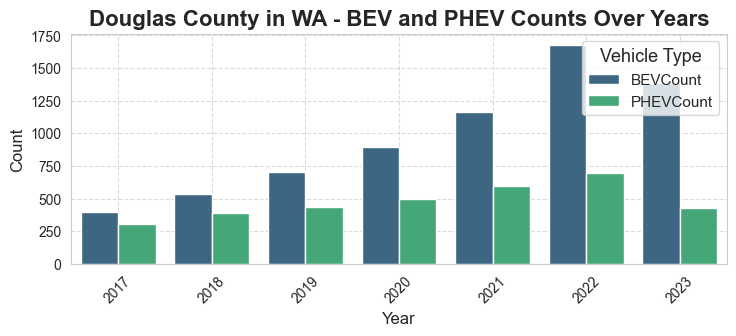

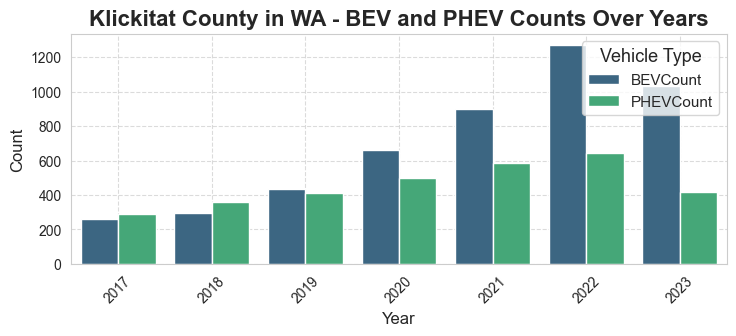

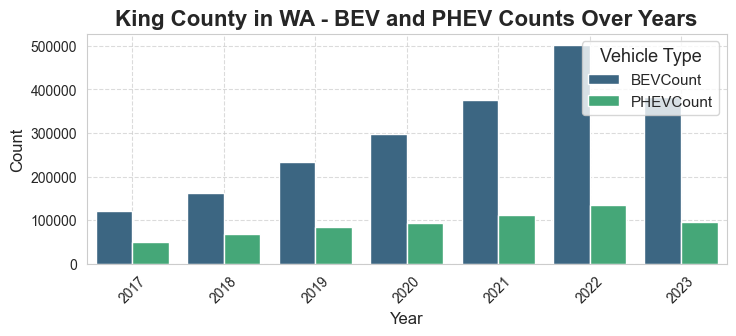

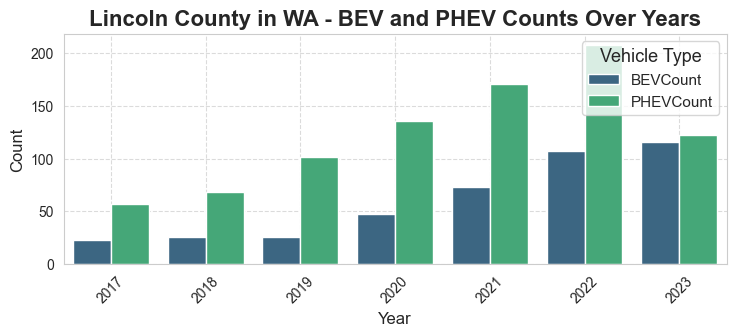

In [10]:
analyze_ev_counts(df2_filtered, "WA", top_counties_WA)

## Result of WA Analysis

### PHEV and BEV Adoption

The majority of counties initially favored PHEVs (Plug-in Hybrid Electric Vehicles) over BEVs (Battery Electric Vehicles) or maintained roughly equal numbers. However, post-2017 witnessed a surge in BEV adoption, which notably outstripped PHEVs in most counties. This indicates a rising trend towards fully electric vehicles, attributed to several potential factors including advancements in battery tech, improved charging infrastructure, or evolving consumer inclinations favoring sustainability and fuel economy.

#### **Lincoln County**

Contrary to the above trend, Lincoln County saw a continued preference for PHEVs over BEVs. This could be a reflection of unique local preferences, requirements, or conditions favoring PHEVs.

#### **King County**

King County stands out with its early and robust adoption of BEVs, and the difference between BEVs and PHEVs has only broadened over time. This trend might stem from an environmentally aware populace, superior charging amenities, or higher average incomes facilitating the purchase of initially pricier BEVs.

### Possible Influencing Factors

- **Local Policies & Awareness**: Regional policies, incentives, and the general level of awareness and education might be significant contributors to these trends. For example, urban or densely populated regions like King County might offer more convenient access to charging facilities and a heightened exposure to the advantages of EVs.
  
- **Economic Factors**: Economic health and average income brackets could be pivotal in steering the trends of EV adoption. Areas with a higher average income might display a greater inclination to invest in EVs.

### Lincoln County's Distinct Trend

The unwavering preference for PHEVs in Lincoln County warrants a deeper dive. A comprehensive exploration into its demographic, topographic, economic, and infrastructural backdrop would provide clarity on this unique inclination.


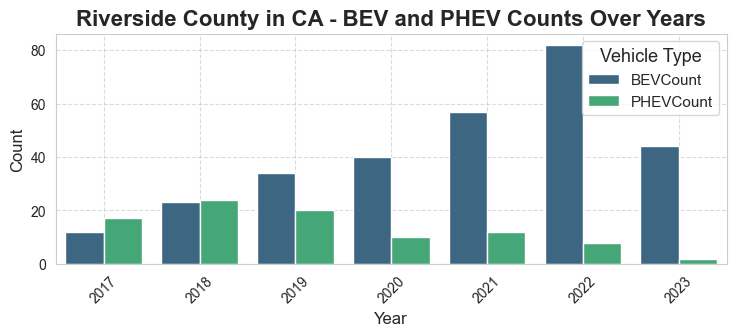

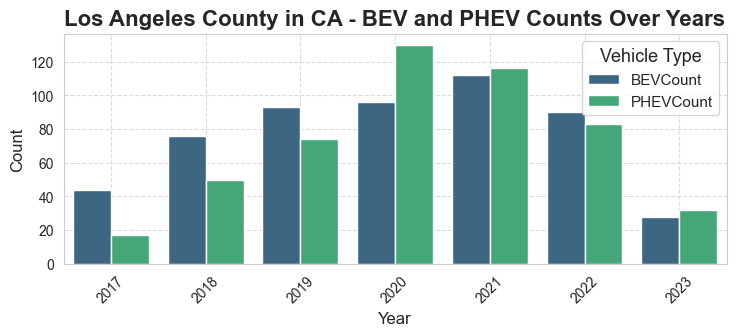

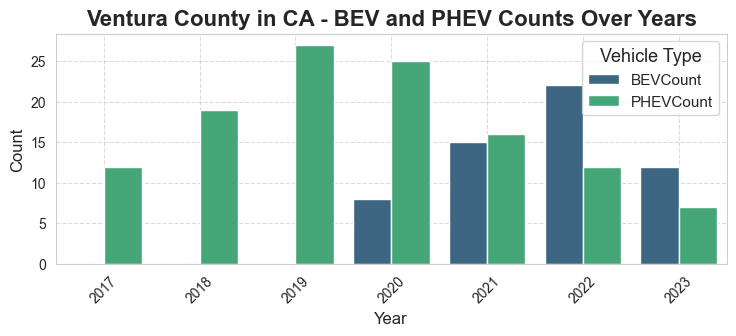

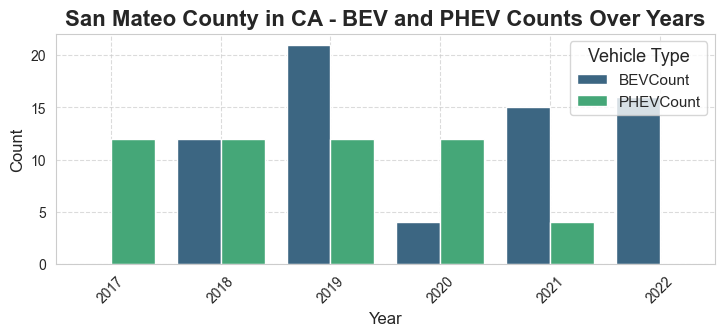

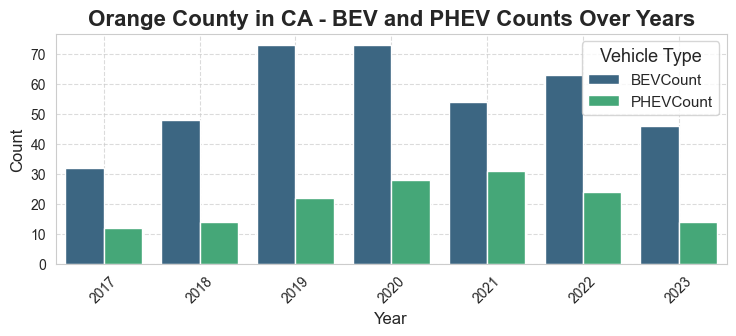

In [11]:
analyze_ev_counts(df2_filtered, "CA", top_counties_CA)

### Result of CA Analysis

#### PHEV and BEV Adoption

##### **Riverside County**
Beginning from 2019, a clear transition from PHEVs to BEVs is evident, marked by a substantial surge in BEVs alongside a drop in PHEVs.

##### **Los Angeles County**
Between 2017 and 2020, PHEVs saw a more pronounced growth compared to BEVs, culminating in a higher PHEV count in 2020. Post-2020, the trend equalized, leading to a balanced adoption of BEVs and PHEVs by 2023.

##### **Ventura County**
Until 2019, BEVs had no presence in the county. However, a swift shift post-2019 marked a surge in BEVs, outpacing PHEVs by 2022.

##### **San Mateo County**
Though there were fluctuations in BEV and PHEV adoptions over the years, by 2022, BEVs took the lead.

##### **Orange County**
From 2017 through 2023, there was an unwavering preference for BEVs over PHEVs.

##### **Inter-County Variations**
The disparate trends across counties hint at diverse consumer demographics, each having distinct needs, preferences, and resource accessibility. The unique trajectory in each county could also be shaped by localized policies, incentives, and charging infrastructure availability.

#### Overall Insights

While the data indicates a burgeoning interest in BEVs across several counties, localized differences in adoption rates between BEVs and PHEVs persist.

Consistent BEV preferences in counties such as Orange might be indicative of conducive local environments, proactive policies, or heightened BEV-centric consumer awareness.

The prominent switch from PHEVs to BEVs in specific counties could be a sign of evolving consumer perceptions about the feasibility and perks of fully electric vehicles. This shift could be propelled by enhancements in battery tech and charging amenities.


### WA vs. CA: A Comparative Analysis on EV Preferences

#### **Similarities**

1. **Shift from PHEV to BEV**: Both states register a significant migration in preference from PHEVs to BEVs over time, indicating an escalating consumer lean towards fully electric vehicles.

2. **Initial PHEV Preference**: The earlier years manifest a higher inclination or adoption of PHEVs in numerous counties. This could be attributed to the dual powertrain advantage of PHEVs, offering both electric and gasoline modes.

3. **Growing BEV Confidence**: Subsequent years document a marked rise in BEV adoptions across multiple counties. This trend might mirror the budding consumer trust in battery electric technology coupled with an expanding charging network.

4. **Early Adopters**: Counties like King (WA) and Los Angeles (CA) emerge as forerunners in EV adoption, showcasing unique patterns possibly rooted in their distinct demographic, economic, or policy landscapes.

#### **Differences**

1. **Rate of Adoption**: A disparity is evident in the adoption pace of BEVs and PHEVs between the two states and within their counties. While some regions witness swift BEV adoption spikes, others display a more measured growth trajectory or even occasional dips.

2. **County Preferences**: The counties diverge in their EV choices. For instance, Lincoln County (WA) remains steadfast in its PHEV preference, whereas Orange County (CA) prominently favors BEVs.

3. **Consistency vs Fluctuations**: Certain counties, like King in WA, demonstrate a consistent leaning towards BEVs. In contrast, some CA counties oscillate in their preference between BEVs and PHEVs over the surveyed period.


### A Comparative Analysis of Evolving Preferences in Electric Vehicle Adoption across WA and CA

What types of electric vehicles are most popular, and what are their typical characteristics like make, model, EVtype etc.?

In [12]:
# wa
df1_top_counties_WA = df1_filtered[
    (df1_filtered["State"] == "WA") & (df1_filtered["County"].isin(top_counties_WA))
]

# ca
df1_top_counties_CA = df1_filtered[
    (df1_filtered["State"] == "CA") & (df1_filtered["County"].isin(top_counties_CA))
]

In [13]:
df1_top_counties_WA["County"].value_counts()

County
King         75383
Douglas        285
Klickitat      234
Lincoln         37
Columbia        16
Name: count, dtype: int64

In [14]:
df1_top_counties_CA["County"].value_counts()

County
Los Angeles    8
Orange         8
Riverside      6
Ventura        2
Name: count, dtype: int64

In [15]:
def get_top_ev_for_each_county(top_counties_df, state_name, top_counties):
    # Group by County and EV attributes and count the occurrences
    grouped_df = (
        top_counties_df.groupby(
            ["County", "Make", "Model", "ModelYear", "EVType", "ElectricRange"]
        )
        .size()
        .reset_index(name="Counts")
    )

    top_ev_df = pd.DataFrame()

    for county in top_counties:
        county_df = grouped_df[grouped_df["County"] == county].nlargest(3, "Counts")
        top_ev_df = pd.concat([top_ev_df, county_df])

    return top_ev_df

In [16]:
# Get the top 3 EVs for each county in both states
top_ev_WA = get_top_ev_for_each_county(df1_top_counties_WA, "WA", top_counties_WA)
top_ev_CA = get_top_ev_for_each_county(df1_top_counties_CA, "CA", top_counties_CA)


print("Top 3 EVs for each county in WA:")
top_ev_WA

Top 3 EVs for each county in WA:


,County,Make,Model,ModelYear,EVType,ElectricRange,Counts
1,Columbia,FORD,F-150,2022,BEV,0,5
0,Columbia,CHEVROLET,BOLT EV,2017,BEV,238,2
9,Columbia,TESLA,MODEL Y,2023,BEV,0,2
108,Douglas,TESLA,MODEL Y,2023,BEV,0,17
85,Douglas,TESLA,MODEL 3,2019,BEV,220,14
89,Douglas,TESLA,MODEL 3,2022,BEV,0,13
674,Klickitat,TESLA,MODEL Y,2023,BEV,0,18
672,Klickitat,TESLA,MODEL Y,2021,BEV,0,12
684,Klickitat,TOYOTA,RAV4 PRIME,2021,PHEV,42,8
517,King,TESLA,MODEL Y,2023,BEV,0,5604


In [17]:
print("Top 3 EVs for each county in CA:")
top_ev_CA

Top 3 EVs for each county in CA:


,County,Make,Model,ModelYear,EVType,ElectricRange,Counts
15,Riverside,TESLA,MODEL 3,2022,BEV,0,2
14,Riverside,TESLA,MODEL 3,2018,BEV,215,1
16,Riverside,TESLA,MODEL S,2013,BEV,208,1
0,Los Angeles,CHEVROLET,VOLT,2013,PHEV,38,1
1,Los Angeles,FORD,FUSION,2016,PHEV,19,1
2,Los Angeles,LAND ROVER,RANGE ROVER,2020,PHEV,19,1
19,Ventura,CHRYSLER,PACIFICA,2021,PHEV,32,1
20,Ventura,TESLA,MODEL 3,2021,BEV,0,1
8,Orange,AUDI,E-TRON,2023,BEV,0,2
10,Orange,TESLA,MODEL 3,2018,BEV,215,2


### Result of the Analysis

#### **Popular Makes and Models**
Tesla models, especially the Model Y and Model 3, are notably preferred in both states, highlighting a strong inclination towards this brand and its models. Known for their impressive range, top-notch performance, and rich feature set, it's no surprise they're at the forefront of popularity.

#### **Model Year**
- **Diverse Range**: The array of top-ranking model years spans from 2013 to 2023, illustrating that both vintage and latest models resonate with the audience. The prominence of recent models (2021-2023) indicates a tilt towards contemporary versions.

- **Older Models' Presence**: Iconic older models, such as the 2013 Tesla Model S and Chevrolet Volt, stand testament to some models' enduring allure, be it due to their lasting reliability, distinct features, or other commendable traits.

- **Varied Vehicle Count**: Counties showcase a stark contrast in vehicle counts. For instance, King County, WA records counts in the thousands, while other counties register much lower figures. These disparities can reflect the intrinsic population and vehicle density or might signify heightened EV adoption in certain territories.

#### **Overall Insights**
- **Tesla's Unwavering Appeal**: Tesla's sweeping dominance across various counties and states can likely be credited to its stellar brand image, unbeatable performance, and the unmatched range of its BEVs. Such ubiquitous admiration accentuates the brand's global charm.

- **Palette of Preferences**: The presence of a medley of brands and models occupying the top ranks in disparate counties highlights the eclectic taste of EV aficionados. These divergent inclinations could be molded by localized needs, infrastructural nuances, and prevailing economic climates.


### Subsequent Analysis to Focus Exclusively on King County.

In reviewing our primary dataset(first dataset), it was observed that the majority of the data pertains to the state of Washington, more specifically, to King County. Given the substantial concentration of data points in this region, it is prudent to refine the scope of our subsequent analysis to focus exclusively on King County. 

How does the distribution of the top 15 EV models vary by legislative district and cities within King County?

In [18]:
df_all = pd.read_csv("data/Electric_Vehicle_Population_Data.csv")

In [19]:
columns_to_keep = [
    "County",
    "City",
    "State",
    "Model Year",
    "Make",
    "Model",
    "Electric Vehicle Type",
    "Electric Range",
    "Clean Alternative Fuel Vehicle (CAFV) Eligibility",
    "Legislative District",
    "Electric Utility",
]


df_king = df_all[df_all["County"] == "King"][columns_to_keep]

In [20]:
grouped_df = (
    df_king.groupby(
        [
            "City",
            "Make",
            "Model",
            "Model Year",
            "Electric Vehicle Type",
            "Clean Alternative Fuel Vehicle (CAFV) Eligibility",
            "Legislative District",
            "Electric Utility",
        ]
    )
    .size()
    .reset_index(name="Count")
)

# get the top 15
top_15_ev = grouped_df.sort_values(by="Count", ascending=False).head(15)

In [21]:
top_15_ev["Make_Model"] = (
    top_15_ev["Make"]
    + " "
    + top_15_ev["Model"]
    + " "
    + top_15_ev["Model Year"].astype(str)
)

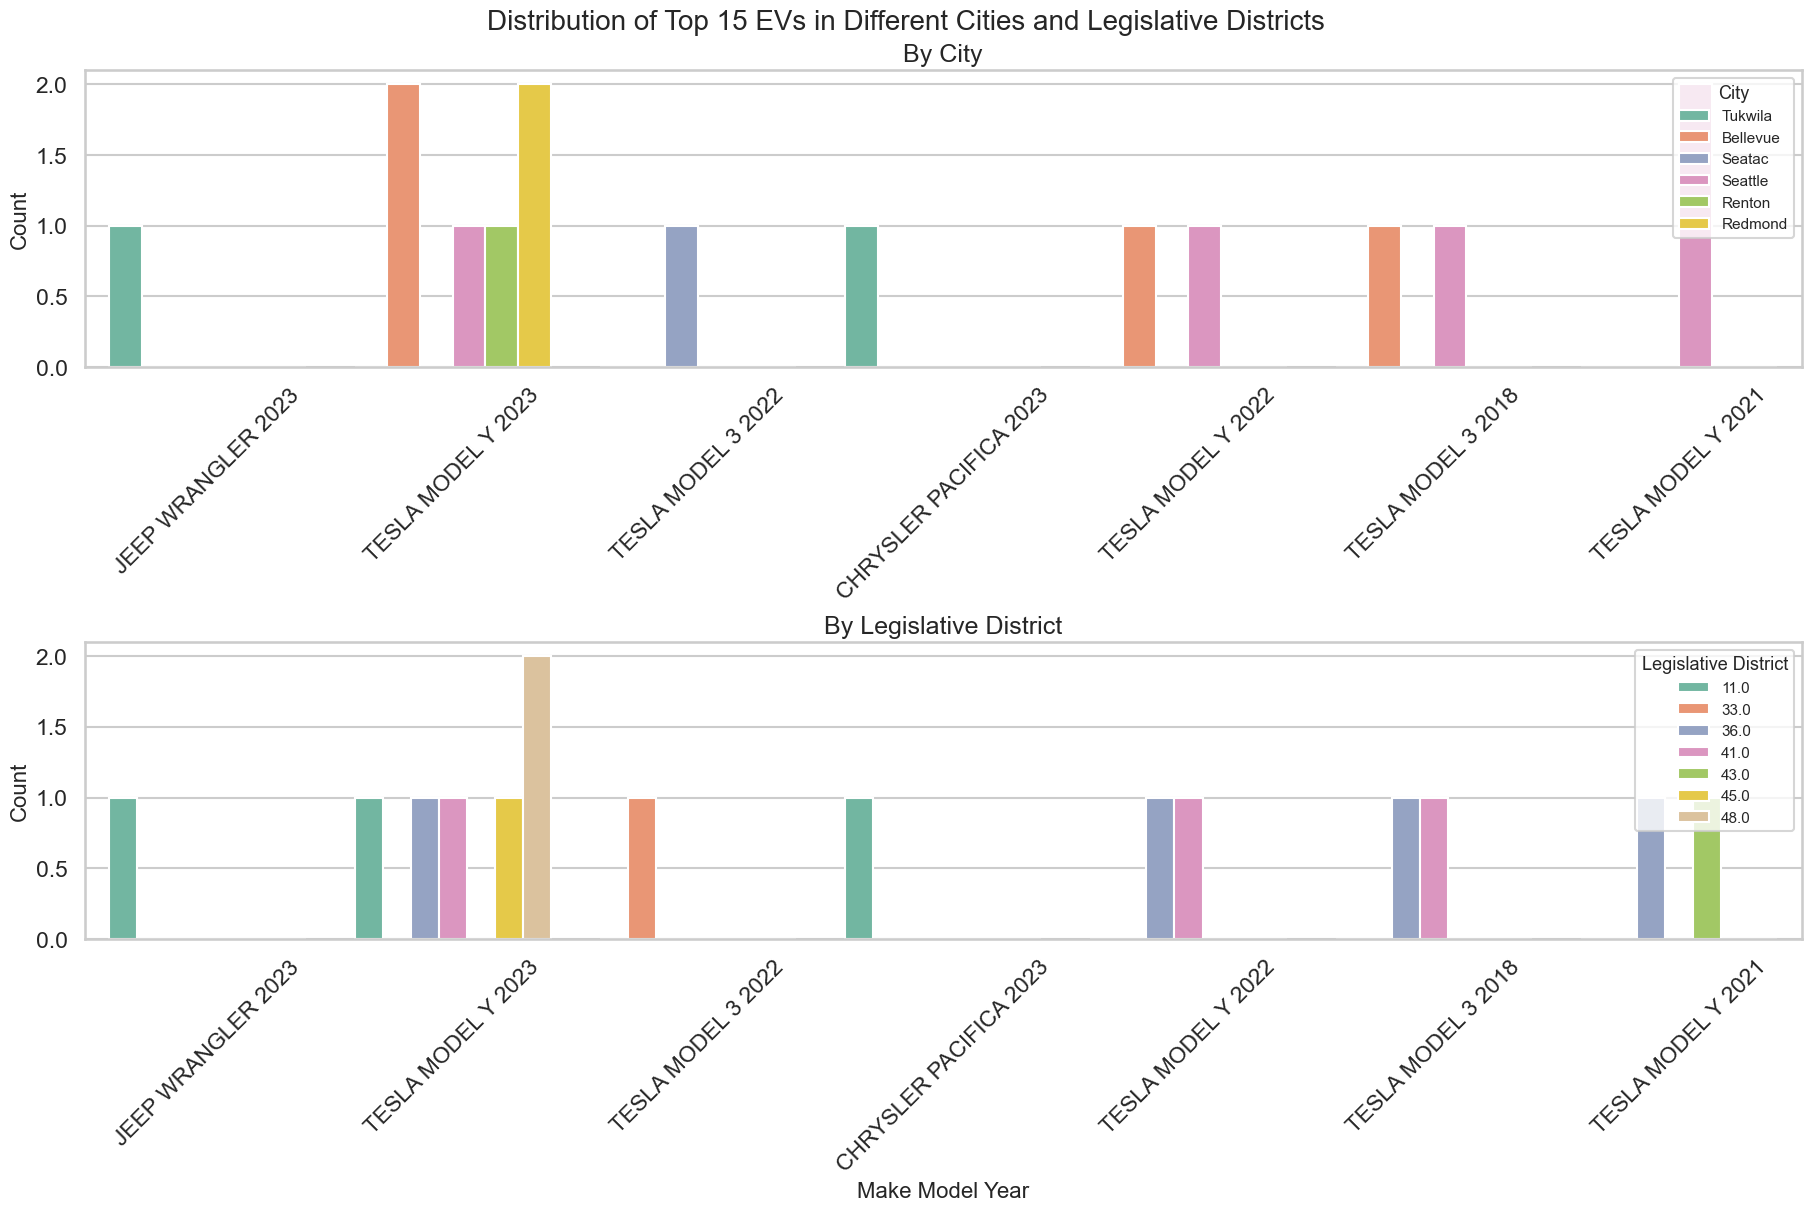

In [22]:
# ----- STYLING -----
# Set style and context
sns.set_style("whitegrid")
sns.set_context("talk")

# Set color palette
palette = "Set2"

# Set font size and family
plt.rcParams.update({"font.size": 12, "font.family": "sans-serif"})

# ----- DATA PREPARATION -----
# Combine columns for a unified Make-Model-Year column
top_15_ev["Make_Model"] = (
    top_15_ev["Make"]
    + " "
    + top_15_ev["Model"]
    + " "
    + top_15_ev["Model Year"].astype(str)
)

# ----- PLOTTING -----
fig, axes = plt.subplots(2, 1, figsize=(18, 12), constrained_layout=True)
fig.suptitle(
    "Distribution of Top 15 EVs in Different Cities and Legislative Districts",
    fontsize=20,
)

# Plot for City
sns.countplot(ax=axes[0], data=top_15_ev, x="Make_Model", hue="City", palette=palette)
axes[0].set_title("By City", fontsize=18)
axes[0].set_xlabel("")
axes[0].set_ylabel("Count", fontsize=16)
axes[0].tick_params(axis="x", rotation=45)
axes[0].legend(loc="upper right", title="City", title_fontsize="13", fontsize="11")

# Plot for Legislative district
sns.countplot(
    ax=axes[1],
    data=top_15_ev,
    x="Make_Model",
    hue="Legislative District",
    palette=palette,
)
axes[1].set_title("By Legislative District", fontsize=18)
axes[1].set_xlabel("Make Model Year", fontsize=16)
axes[1].set_ylabel("Count", fontsize=16)
axes[1].tick_params(axis="x", rotation=45)
axes[1].legend(
    loc="upper right", title="Legislative District", title_fontsize="13", fontsize="11"
)

# Display the plots
plt.show()

### Result of the Analysis
**Distribution of Top 15 EVs in Different Cities and Legislative Districts**

- **Tesla Model Y 2023**: Appears to be more widely distributed across the cities and districts.

- **Localized Presence**: Other models predominantly appear within specific cities and districts.

- **Seattle & Bellevue**: Feature a diverse range of top EV models, notably the Tesla Model Y 2022, Tesla Model 3 2018, and Tesla Model Y 2021.

- **Tukwila & District 11.0**: Uniquely have a presence of Jeep Wrangler 2023 and Chrysler Pacifica 2023.

- **District 33.0**: Distinctly features the Tesla Model 3 2022.

- **District 43.0**: Notably lacks the Tesla Model Y 2023, suggesting varying preferences or availability constraints.

- **SeaTac**: Notably has the Tesla Model 3 2022.

- **Redmond & Renton**: None of the top models are present, indicating other preferences.

- **Tesla Model Y 2023 Popularity**: This model is observed in 4 cities, highlighting its wide acceptance.

- **Top Models**: Most other models are predominantly present in specific cities, suggesting an alignment with the demographics or socio-economic characteristics of these cities.

**Factors Influencing EV Distribution in King County**

- **Urban Density**: More urbanized areas might have higher EV adoption due to shorter travel distances and higher traffic congestion, making EVs more efficient.

- **Zoning & Planning**: Progressive urban planning can promote EV adoption.

- **Local Incentives**: Some areas might offer additional incentives like tax credits or rebates, influencing the adoption rate.

- **Legislative Support**: Areas with supportive legislation for green initiatives could see a higher adoption of EVs.
